In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sc

In [134]:
# Load dataset
df = pd.read_csv('country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [136]:
# Display dataset information
print(df.head())
print(df.info())

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-nul

In [138]:
df.keys()

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [140]:
df.shape

(167, 10)

In [142]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [146]:
features = df[['child_mort', 'exports', 'health', 'imports', 'income',
                 'inflation', 'life_expec', 'total_fer', 'gdpp']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## K-Means Clustering

In [149]:
# Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

In [150]:
wcss

[1503.0,
 1063.482560046779,
 831.5351582151585,
 751.1915754969666,
 620.3621532663785,
 563.5602864947638,
 496.2696004780956,
 490.80083627454235,
 455.01702204835817,
 433.53844084848174]

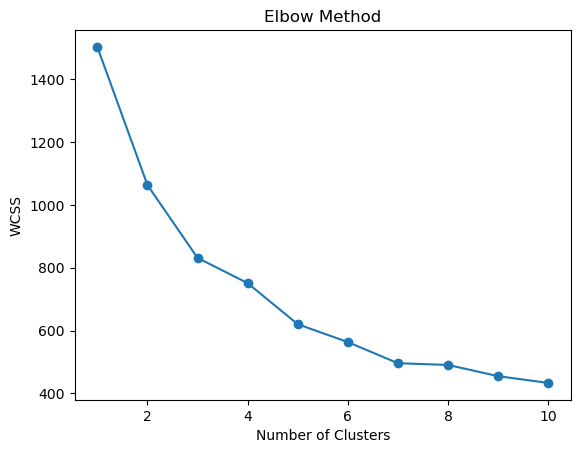

In [151]:
# Plot the Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [152]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing') # convex as value of wcss is decreasing
kl.elbow

5

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


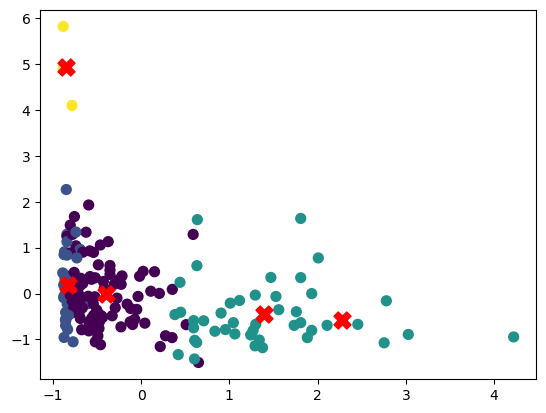

In [153]:
# Apply K-Means with optimal clusters
kmeans = KMeans(n_clusters=5, random_state=42, init='k-means++')
clusters = kmeans.fit_predict(scaled_features)
# Add cluster labels to the original data
data['Cluster'] = clusters
plt.scatter(scaled_features[:,0], scaled_features[:,1], c=clusters, s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='red', marker='X')  # Centroids
plt.show()

In [154]:
# Performance metrics
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42, init="k-means++")
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

In [156]:
silhouette_coefficients

[0.2662961111870726,
 0.285600988953231,
 0.2880471307804802,
 0.30088229124112015,
 0.23565028812238528,
 0.2479313491087983,
 0.20198237114728412,
 0.19230727869997855,
 0.19624516158796698]

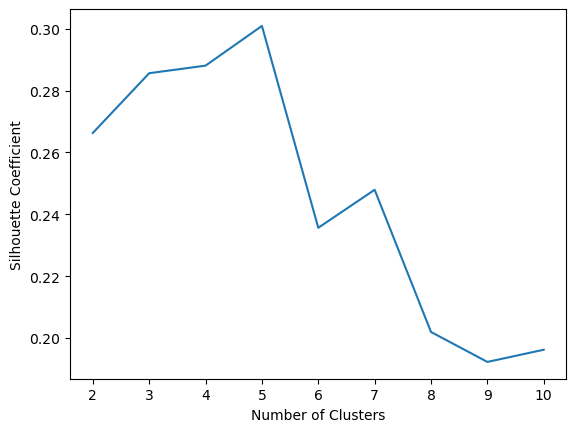

In [159]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## DBSCAN Clustering

In [162]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Display number of clusters (-1 indicates noise points)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print("Number of clusters: ",n_clusters)

Number of clusters:  5


In [164]:
# Calculate Silhouette Score
if n_clusters > 1:
    score = silhouette_score(scaled_features, clusters)
    print(f"Silhouette Score: {score:.2f}")
else:
    print("Silhouette Score cannot be calculated with less than 2 clusters.")


Silhouette Score: 0.30


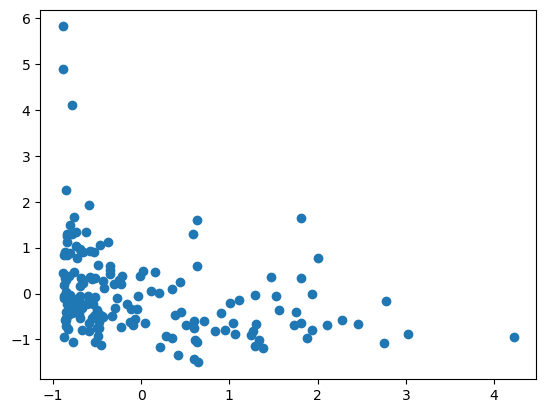

In [165]:
plt.scatter(scaled_features[:,0], scaled_features[:,1])

## Hierarchical Clustering

Text(0, 0.5, 'Eucledian Distance')

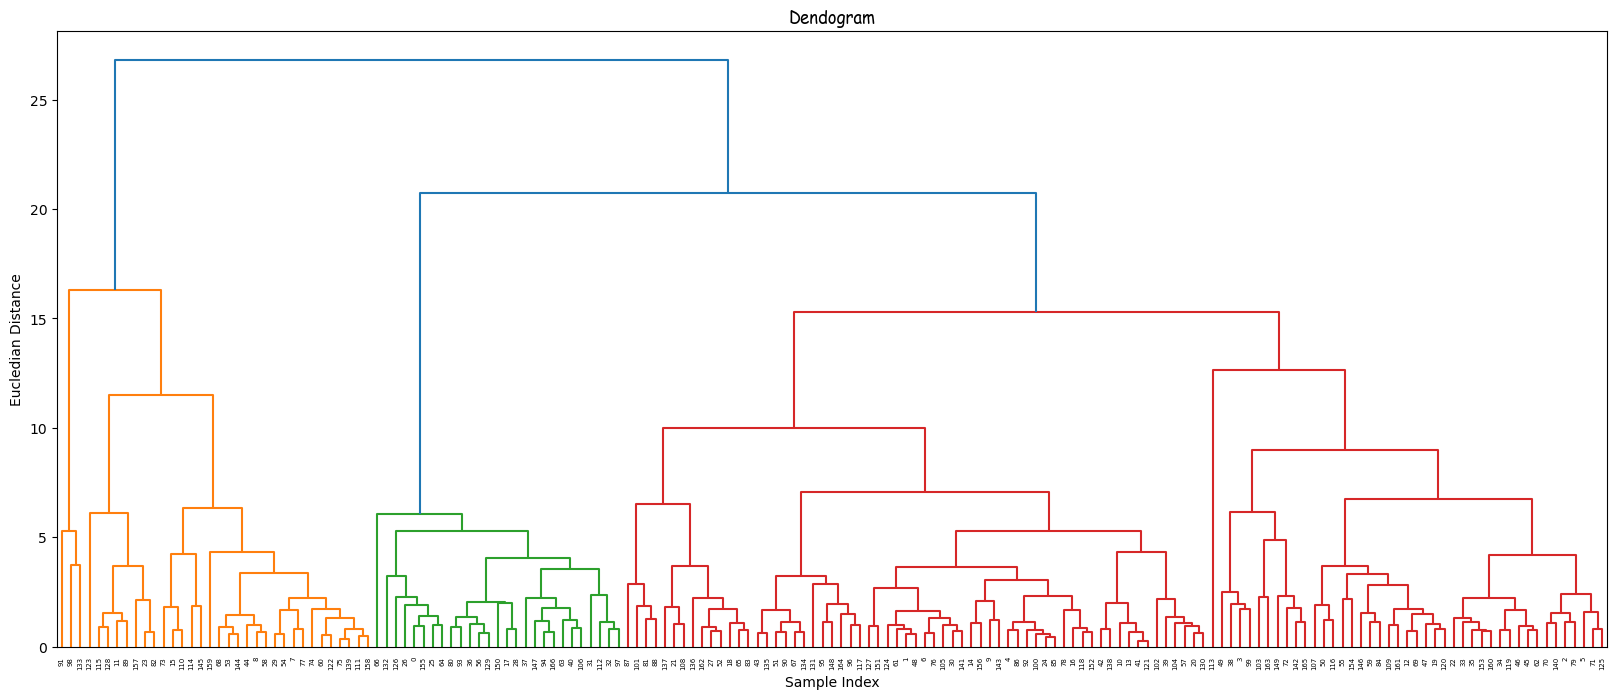

In [168]:
# Agglomerative clustering

# plot the dendogram
plt.figure(figsize=(20,8))
plt.title("Dendogram", fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# create dendogram
sc.dendrogram(sc.linkage(scaled_features, method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [173]:
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2,11):
    agglo = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    agglo.fit(scaled_features)
    score = silhouette_score(scaled_features, agglo.labels_)
    silhouette_coefficients.append(score)

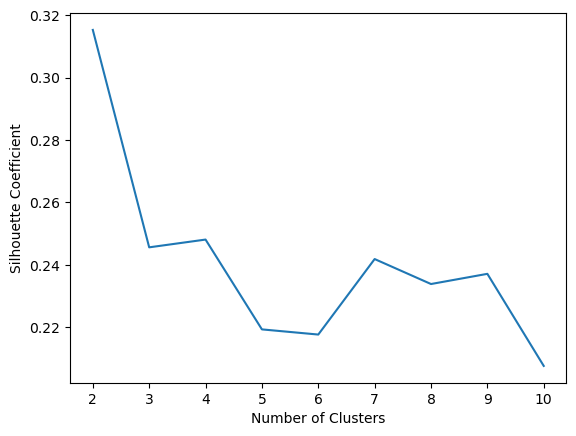

In [175]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [164]:
def manual_test(input_data):
    input_scaled = scaler.transform([input_data])
    cluster_label = kmeans.predict(input_scaled)
    return cluster_label[0]

print("Enter the following values for testing:")
child_mort = float(input("Child Mortality: "))
exports = float(input("Exports: "))
health = float(input("Health: "))
imports = float(input("Imports: "))
income = float(input("Income: "))
inflation = float(input("Inflation: "))
life_expec = float(input("Life Expectancy: "))
total_fer = float(input("Total Fertility: "))
gdpp = float(input("GDP per capita: "))

test_data = [child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp]
predicted_cluster = manual_test(test_data)

print(f"The predicted cluster for the input data is: {predicted_cluster}")

Enter the following values for testing:


Child Mortality:  90.2
Exports:  10
Health:  7.58
Imports:  44.9
Income:  1610
Inflation:  9.44
Life Expectancy:  56.2
Total Fertility:  5.82
GDP per capita:  553


The predicted cluster for the input data is: 2


C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
